<a href="https://colab.research.google.com/github/Yasir323/100-days-of-code/blob/master/Importance_of_Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the datasets

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
%matplotlib inline
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
SEED = 42
FIG_SIZE = (10, 7)

In [3]:
features, target = load_wine(return_X_y=True)
features[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [4]:
features.shape

(178, 13)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=SEED, shuffle=True, stratify=target)

In [6]:
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
unscaled_pred = unscaled_clf.predict(X_test)
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, unscaled_pred)))


Prediction accuracy for the normal test dataset with PCA
70.37%



In [7]:
scaled_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
scaled_clf.fit(X_train, y_train)
scaled_pred = scaled_clf.predict(X_test)
print('\nPrediction accuracy for the standardised test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, scaled_pred)))


Prediction accuracy for the standardised test dataset with PCA
96.30%



## Extract PCA from the pipeline

In [8]:
pca = unscaled_clf.named_steps['pca']
pca_std = scaled_clf.named_steps['pca']

#### First principal component

In [9]:
print(f'PC1 without scaling: {pca.components_[0]}')
print(f'PC1 with scaling: {pca_std.components_[0]}')

PC1 without scaling: [ 1.74087285e-03 -7.87240278e-04  2.01187511e-04 -4.90875090e-03
  1.96149402e-02  9.97140570e-04  1.55604577e-03 -1.07995767e-04
  5.33957359e-04  2.34399525e-03  1.60643649e-04  7.06140442e-04
  9.99788846e-01]
PC1 with scaling: [-0.15763477  0.25237011  0.01662626  0.23514225 -0.14285062 -0.38989121
 -0.42596901  0.28675917 -0.30864294  0.08886736 -0.30119689 -0.37783572
 -0.28836287]


In [10]:
X_train_transformed = pca.transform(X_train)
scaler = scaled_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# Visualize the data

In [11]:
def plot():
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

  for index, color, marker in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(
        X_train_transformed[y_train==index, 0],
        X_train_transformed[y_train == index, 1],
        c=color,
        label='class %s' %index,
        alpha=0.5,
        marker=marker,
    )
  for index, color, marker in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(
        X_train_std_transformed[y_train==index, 0],
        X_train_std_transformed[y_train == index, 1],
        c=color,
        label='class %s' %index,
        alpha=0.5,
        marker=marker,
    )

  ax1.set_title('Training dataset after PCA')
  ax2.set_title('Standardized Training dataset after PCA')

  for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

  plt.tight_layout()
  plt.show()

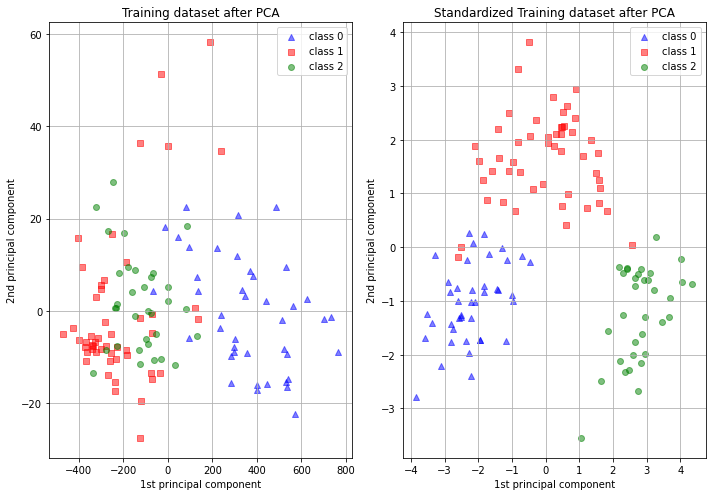

In [12]:
plot()

Reference: <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py">Sklearn Documentation</a>